In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

worksheet = gc.open('deep learning').sheet1

In [ ]:
rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'input':'float'})
df = df.astype({'output':'float'})
df.head()

,input,output
0,1.0,8.0
1,2.0,13.0
2,3.0,18.0
3,4.0,23.0
4,5.0,28.0


In [ ]:
X=df[['input']].values
y=df[['output']].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=33)
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1=Scaler.transform(X_train)
X_train1

array([[0.58695652],
       [0.97826087],
       [0.54347826],
       [0.86956522],
       [0.89130435],
       [0.82608696],
       [0.13043478],
       [0.95652174],
       [1.        ],
       [0.60869565],
       [0.65217391],
       [0.08695652],
       [0.17391304],
       [0.84782609],
       [0.30434783],
       [0.43478261],
       [0.19565217],
       [0.2173913 ],
       [0.63043478],
       [0.23913043],
       [0.67391304],
       [0.7173913 ],
       [0.26086957],
       [0.36956522],
       [0.7826087 ],
       [0.02173913],
       [0.15217391],
       [0.34782609],
       [0.        ],
       [0.47826087],
       [0.10869565],
       [0.39130435]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
ai_brain=Sequential([
    Dense(9,activation='relu'),
    Dense(11,activation='relu'),

    Dense(1)
])

In [ ]:
ai_brain.compile(
    optimizer = 'rmsprop',
    loss = 'mse'
)

ai_brain.fit(X_train1,y_train,epochs = 3000)

Epoch 1/3000
1/1 [==============================] - 1s 804ms/step - loss: 21669.5020
Epoch 2/3000
1/1 [==============================] - 0s 10ms/step - loss: 21663.1797
Epoch 3/3000
1/1 [==============================] - 0s 11ms/step - loss: 21658.6328
Epoch 4/3000
1/1 [==============================] - 0s 12ms/step - loss: 21654.8418
Epoch 5/3000
1/1 [==============================] - 0s 13ms/step - loss: 21651.4883
Epoch 6/3000
1/1 [==============================] - 0s 10ms/step - loss: 21648.4238
Epoch 7/3000
1/1 [==============================] - 0s 9ms/step - loss: 21645.5703
Epoch 8/3000
1/1 [==============================] - 0s 8ms/step - loss: 21642.8750
Epoch 9/3000
1/1 [==============================] - 0s 12ms/step - loss: 21640.3047
Epoch 10/3000
1/1 [==============================] - 0s 12ms/step - loss: 21637.8320
Epoch 11/3000
1/1 [==============================] - 0s 13ms/step - loss: 21635.4414
Epoch 12/3000
1/1 [==============================] - 0s 9ms/step - loss: 21

<Axes: >

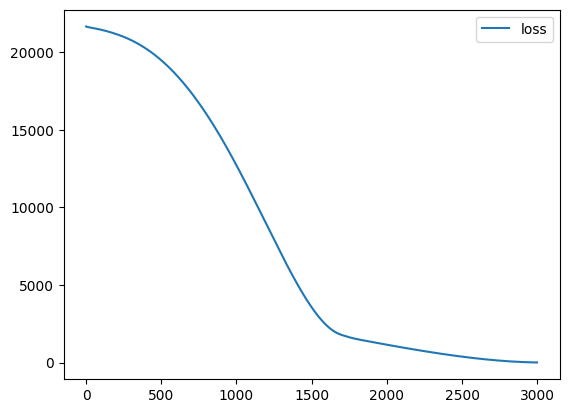

In [ ]:
loss_df = pd.DataFrame(ai_brain.history.history)

loss_df.plot()

In [ ]:
ai_brain.evaluate(X_test,y_test)

X_n1 = [[101]]

X_n1_1 = Scaler.transform(X_n1)

ai_brain.predict(X_n1_1)

1/1 [==============================] - 0s 94ms/step


array([[494.00534]], dtype=float32)